## Implementation of "Lacunarity indices as measures of landscape texture" Plotnick et.al




In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d as conv2d
import time
import pandas as pd

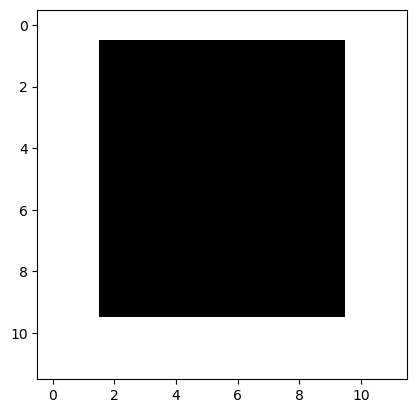

In [2]:
x1 = np.zeros((12,12))
x1[0,:] = 1
x1[-1,:] = 1
x1[-2,:] = 1
x1[:, 0] = 1
x1[:,-1] = 1
x1[:, 1] = 1
x1[:, -2] =1

plt.imshow(x1, cmap = 'gray')


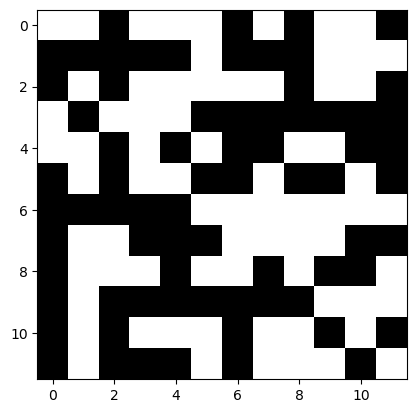

In [3]:
x2 = np.array([
    1,1,0,1,1,1,0,1,0,1,1,0,
    0,0,0,0,0,1,0,0,0,1,1,1,
    0,1,0,1,1,1,1,1,0,1,1,0,
    1,0,1,1,1,0,0,0,0,0,0,0,
    1,1,0,1,0,1,0,0,1,1,0,0,
    0,1,0,1,1,0,0,1,0,0,1,0,
    0,0,0,0,0,1,1,1,1,1,1,1,
    0,1,1,0,0,0,1,1,1,1,0,0,
    0,1,1,1,0,1,1,0,1,0,0,1,
    0,1,0,0,0,0,0,0,0,1,1,1,
    0,1,0,1,1,1,0,1,1,0,1,0,
    0,1,0,0,0,1,0,1,1,1,0,1]).reshape((12,12))

plt.imshow(x2, cmap = 'gray')

In [ ]:
def lac_calc_table(x, box):
    
    """ Outputs a table of S, n(S,r),Q(S,r),
       SQ(S,r), S^2Q(S, r) for a given box 
       size r, as in table 1 in the paper
       
       Arguments
       ---------
       x : a 2d binary map
       box : box size 
       
       Returns
       _______
       
       pandas dataframe 
       
       
       """
    
    
    S = np.array([i for i in range(0, (box**2) + 1)]) # possible number of occupancied sites in a box 
    
    '''
    a =  np.ravel(conv2d(x2, np.ones((box, box)), mode = 'valid'))
    count = np.array([sum(a.ravel()==i) for i in range(0,box**2 + 1)])
    '''
    count, edge= np.histogram(np.ravel(conv2d(x, np.ones((box, box)), mode = 'valid')),
                              bins = [i for i in range(0, (box**2) + 2)])
    
    N_r =  (x.shape[0] - r + 1)**2
    
    q = count/N_r
    sq = S*q
    s2q = S*S*q
    z1 =  sum(sq)
    z2 = sum(s2q)
    lambda_ = z2/(z1**2)
    
    df = pd.DataFrame({'S':S,
                   'n(S,r)':count,
                   'Q(S,r)':q,
                    'SQ(S,r)':sq,
                    'S2Q(S,r)':s2q})
    
    print('box size r : ' ,r)
    print('Z(1):', z1)
    print('Z(2):', z2)
    print('lambda:', lambda_)
    
    return df

In [ ]:
lac_calc_table(x2, 2)

# Lacunarity analysis of simulated maps

### Hierarchically structured random maps were generated by a recursive algorithm derived from the methods of fractal geometry known as curdling 

In [ ]:
def RandHierarchFracGen(level, size, prob1 ):
    
    
    '''
    The funtion generates hierarchically 
    structured random maps using curdling.
    
    args: level- number of levels of succesively
                 finer scales within the map
                 
          size - size of the final map
          
          prob1 - list containing fraction of 
                  1s in each level
                  
    returns : A numpy array
    
    
    '''
    
    
    L = int(np.round(size**(1/level)))
    
    m = np.random.choice([1,0], size=((L,L)), replace=True, p=[prob1[0],1-prob1[0]])
    
    for k in range(1, level):
        
        A = m.ravel()

        B = []


        for r in range(len(A)):
            if A[r] == 1:
                   B.append(np.random.choice([1,0], size=((L,L)), replace=True, p=[prob1[k],1-prob1[k]]))
            else:
                B.append(np.zeros((L,L)))
                
                
        B =  np.array(B)
        
        

        x =  np.zeros((L**(k+1),L**(k+1)))
        
        
        p = 0
        
        for i in range(0, L**k):
            for j in range(0,L**k):

                r1 = L*i
                r2 = r1 + L

                c1 =  L*j
                c2 =  c1 + L
                x[r1:r2, c1:c2] = B[p]
                p+=1

        m = x
        
        
        #plt.imshow(m, cmap = 'gray')
        
        
        
        
    return m
    

    
    
    

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
ax[0,0].imshow(RandHierarchFracGen(3, 216, [0.806, 0.806,0.806]), cmap = 'gray')
ax[0,1].imshow(RandHierarchFracGen(3, 216, [1,1,0.5]), cmap = 'gray')
ax[1,0].imshow(RandHierarchFracGen(3, 216, [0.5,1,1]), cmap = 'gray')
ax[1,1].imshow(RandHierarchFracGen(3, 216, [1,0.5,1]), cmap = 'gray')

## Lacunarity Analysis

In [ ]:

map_type = ['Top91', 'Middle91', 'Bottom91', 'Same91', 
            'Top50', 'Middle50', 'Bottom50','Same50',
            'Top02', 'Middle02', 'Bottom02', 'Same02', 'Dn02', 'Up02']
p1 = [0.917,1,1,0.972,0.5,1,1,0.805,0.028,1,1,0.306,1,0.167 ]
p2 = [1, 0.917, 1,0.972,  1, 0.500, 1, 0.806, 1, 0.028,1, 0.306, 0.167, 1]
p3 = [1,1,0.917, 0.972, 1,1,0.500, 0.806, 1,1,0.028, 0.306, 0.167, 1]
P = [0.917,0.917,0.917,0.919,0.500,0.500, 0.500, 0.528,  0.028, 0.028, 0.028, 0.028,  0.028, 0.028 ]

#Total_Edges = []

maps = pd.DataFrame({'Map Type': map_type,'p1':p1, 'p2':p2, 'p3':p3, 'P':P })

In [ ]:
maps

In [ ]:
random91 = np.random.choice([1,0], size=((216,216)), replace=True, p=[0.917,1-0.917])
random50 = np.random.choice([1,0], size=((216,216)), replace=True, p=[0.5,0.5])
random02 = np.random.choice([1,0], size=((216,216)), replace=True, p=[0.028,1-0.028])

In [4]:
def lacunarity(x):


    
    box_size = [1,2,4,8,16,32,64,128]
    
    LAMBDA = []
  
    for box in box_size:
        
        count, edge= np.histogram(np.ravel(conv2d(x, np.ones((box, box)), mode = 'valid')), bins = [i for i in range(0, (box**2) + 2)])
        q = count/(x.shape[0] - box + 1)**2
        s = np.array([i for i in range(0,box**2 + 1)])
        lam_bda =  sum((s**2)*q)/(sum(q*s))**2
        
        LAMBDA.append(lam_bda)
    
        
        
        
    return LAMBDA

In [5]:
lacunarity(x2)

[2.0,
 1.2156784982483975,
 1.0370794242759747,
 1.0021995392608567,
 0.36,
 0.8185941043083901,
 0.9259522961908151,
 0.9661041712323764]

In [ ]:
box_size = [1,2,4,8,16,32,64,128]
maps =  np.array(maps)

In [ ]:
fig, ax =  plt.subplots(1,3,figsize=(9,3))

for i in range(len(maps)):
    if  maps[i,4] == 0.5: 
        ax[0].plot(np.log(box_size),np.log(lacunarity(RandHierarchFracGen(3, 216, maps[i,1:-1] )) ),'-o')
        
ax[0].plot(np.log(box_size),np.log(lacunarity(random50)), '--')
ax[0].set_title('P = 0.5')


for i in range(len(maps)):
    if  maps[i,4] == 0.917: 
        ax[1].plot(np.log(box_size),np.log(lacunarity(RandHierarchFracGen(3, 216, maps[i,1:-1] )) ),'-o')
        
ax[1].plot(np.log(box_size),np.log(lacunarity(random91)), '--')
ax[1].set_title('P = 0.917')


for i in range(len(maps)):
    if  maps[i,4] == 0.028: 
        ax[2].plot(np.log(box_size),np.log(lacunarity(RandHierarchFracGen(3, 216, maps[i,1:-1] )) ),'-o')
        
ax[2].plot(np.log(box_size),np.log(lacunarity(random02)), '--')
ax[2].set_title('P = 0.028')




fig.text(0.5, 0.04, 'ln (box size)', ha='center', va='center')
fig.text(0.06, 0.5, 'ln (lacunarity)', ha='center', va='center', rotation='vertical')

In [ ]:
%timeit RandHierarchFracGen(3, 216, [0.806, 0.806,0.806])

In [ ]:
%prun RandHierarchFracGen(3, 216, [0.806, 0.806,0.806])